<a href="https://colab.research.google.com/github/drskprabhakar/AI-ML-DL-colab-notebooks-coding-models/blob/main/CNN_mild_moderate_DR_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import os
import numpy as np
os.listdir('/content/drive/MyDrive/Mild DR undersampled moderate DR folder/split')


['train', 'val', 'test']

In [27]:
os.listdir('/content/drive/MyDrive/Mild DR undersampled moderate DR folder/split/train')


['Mild', 'undersampled_Moderate']

In [28]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale=1/255)

trainimages = datagen.flow_from_directory('/content/drive/MyDrive/Mild DR undersampled moderate DR folder/split/train',
                                          target_size=(64,64),
                                          class_mode='binary')

valimages = datagen.flow_from_directory('/content/drive/MyDrive/Mild DR undersampled moderate DR folder/split/val',
                                          target_size=(64,64),
                                          class_mode='binary')
testimages = datagen.flow_from_directory('/content/drive/MyDrive/Mild DR undersampled moderate DR folder/split/test',
                                            target_size=(64,64),
                                            class_mode='binary')


Found 591 images belonging to 2 classes.
Found 74 images belonging to 2 classes.
Found 75 images belonging to 2 classes.


In [29]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([Conv2D(32,(3,3), activation='relu', input_shape=(64,64,3)),
                     MaxPooling2D(2,2),

                     Conv2D(64,(3,3), activation='relu'),
                     MaxPooling2D(2,2),

                     Flatten(),
                     Dense(64, activation='relu'),
                     Dense(1, activation='sigmoid')])
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 31, 31, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 12544)             0         
                                                                 
 dense_8 (Dense)             (None, 64)               

In [30]:
model.fit(trainimages,
          batch_size=32,
          epochs=10,
          validation_data=valimages)
model.save('mild_moderate_DRVGG16_model.keras')

Epoch 1/10
19/19 [==============================] - 10s 472ms/step - loss: 0.6715 - accuracy: 0.5804 - val_loss: 0.6163 - val_accuracy: 0.6622
Epoch 2/10
19/19 [==============================] - 8s 403ms/step - loss: 0.6582 - accuracy: 0.6447 - val_loss: 0.5859 - val_accuracy: 0.7297
Epoch 3/10
19/19 [==============================] - 8s 420ms/step - loss: 0.6229 - accuracy: 0.6684 - val_loss: 0.5923 - val_accuracy: 0.6757
Epoch 4/10
19/19 [==============================] - 6s 317ms/step - loss: 0.5939 - accuracy: 0.7124 - val_loss: 0.5587 - val_accuracy: 0.7162
Epoch 5/10
19/19 [==============================] - 8s 396ms/step - loss: 0.5740 - accuracy: 0.7310 - val_loss: 0.5543 - val_accuracy: 0.7432
Epoch 6/10
19/19 [==============================] - 6s 319ms/step - loss: 0.5558 - accuracy: 0.7327 - val_loss: 0.5335 - val_accuracy: 0.7568
Epoch 7/10
19/19 [==============================] - 8s 404ms/step - loss: 0.5458 - accuracy: 0.7377 - val_loss: 0.5228 - val_accuracy: 0.7432
Epoch

In [96]:
predictions = model.predict(testimages)

3/3 [==============================] - 1s 157ms/step


In [97]:
predictions[predictions<0.5]=0
predictions[predictions>0.5]=1

In [94]:
y_true = testimages.classes

In [98]:
from sklearn import metrics
metrics.confusion_matrix(y_true, predictions)

array([[30,  8],
       [17, 20]])

In [99]:
print(metrics.classification_report(y_true, predictions,
                                    target_names=('mild DR', 'moderate DR')))

              precision    recall  f1-score   support

     mild DR       0.64      0.79      0.71        38
 moderate DR       0.71      0.54      0.62        37

    accuracy                           0.67        75
   macro avg       0.68      0.67      0.66        75
weighted avg       0.68      0.67      0.66        75



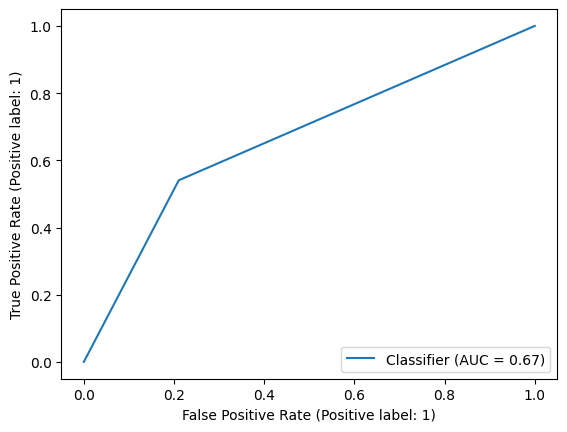

In [100]:
metrics.RocCurveDisplay.from_predictions(y_true, predictions)

In [68]:
testimages.class_indices

{'Mild': 0, 'undersampled_Moderate': 1}

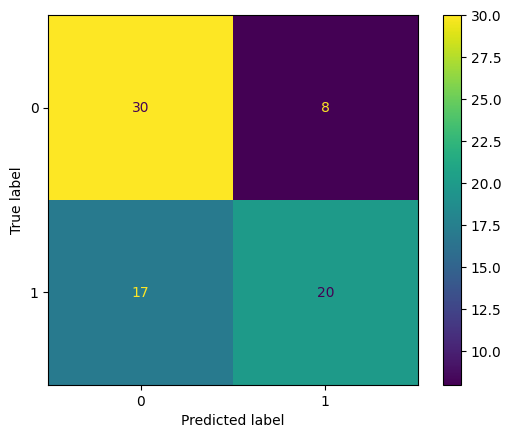

In [101]:
metrics.ConfusionMatrixDisplay.from_predictions(y_true, predictions)